In [ ]:
<img src="xx.png" width="50%">

# 1st Notebook example: Keyword and Topic modelling

**[Purpose](#Purpose)** | **[Motivation](#Motivation)** |**[Features](#Features)** |**[Prerequisites](#Prerequisites)** |**[Quick start](#Quick-start)** |**[How-to-use](#How-to-use)**|

# Purpose 

**For any set of portfolio documents, automatically generate keywords and summaries per document, and generate a set of the main topics found. Accordingly, generate a data-model for the portfolio** 


# Motivation

Projects have different business and function aspects. These notebooks can be used to run simple code on a set of pdf and text files that the user has collected for their particular business domain. 

Below is basic code that can be applied directly to  any portfolio documents. Here this code is worked through with an example of understanding the implications of the regulatory environment on project delivery in the nuclear sector.This can be replaced as the user generates her own results. 

For simplicity, this one starts from documents as text files and internet pages. Additional features can be sought in the other notebooks once first results have been generated for your portfolio documents. 

# Features
- Summarises each document
- finds keywords for each document
- creates a similarity-search: for any new paragraph, it finds the most similar documents from the library
- (propose a data-model for the portfolio, based upon these findings) ***(Status: incomplete)***

# Prerequisites 

The following Python libraries are needed: Gensim, BS4. Also NLTK and SpaCy. Gensim requires NumPy and SciPy. NLTK requires Pandas.

For example, if one chooses to do it in Conda:

1. Install Miniconda

1. Create GENSIM_ENV environment with an appropriate Python version

1. Install Gensim dependencies. Currently these are NumPy then SciPy and then Gensim 

1. conda activate GENSIM_ENV . Then jupyter lab

(one may need to also activate the Env again once in Jupyter lab)


# Quick-start

It is suggested to move straight down to **[How-to-use](#How-to-use)** to get started.

(Otherwise, Attributes and adjustments are included immediately below for ease of reference, but best consulted after using the notebook).

The user can start from the markdown file (xx) showing and explaining the code, or can work through the notebook directly (xx). Some minor detail is hidden in the markdown file, but shown in the notebook.

# Attributes

- Uses GENSIM library
- Starts from Text file rather than PDF
- also starts from Internet page
- creates corpus at Document level rather than paragraph level
- for Topic model, starts from Bag of Words model, as an interim step only
- It uses TFIDF model only as an interim step to LSI only
- for similarity-search, it uses cosine similarity, based upon LSI model

# Attributes you can find in the other notebooks
- Using other libraries than Gensim
- Starting from Text file
- creates corpus at paragraph level
- uses Bag of Words model to generate results directly for similarity search

# Easy adjustments that can be made, but have not been shown
- for Topic model, uses only Bag of Words model 
- for similarity-search, using cosine similarity, based upon TFIDF model
- for topic model, uses methods other than LSI. 

# How-to-use

## Installation

First Check installation has been made, as per the [READme](https://github.com/lawrencerowland/Data-Model-for-Project-Frameworks/blob/master/Project-frameworks-by-using-NLP-with-Python-libraries/README.md)

## Import Gensim
The code is provided for the specific modules to be imported

In [1]:
#hide
import gensim
from gensim.summarization import summarize
from gensim.summarization import keywords
from gensim.summarization.keywords import get_graph
from gensim.summarization import mz_keywords
import networkx as nx
import matplotlib as plt
import pandas as pd  
# Note that Smart_open.gcs may not import successfully depending on Gensim set up. This doesnt matter. 

unable to import 'smart_open.gcs', disabling that module


## Change Directory to find the portfolio text files

This code uses the OS module to select the file with the user's text-files.

In [2]:
#hide
import os
directory = '/Users/lawrence/Documents/GitHub/Data-Model-for-Project-Frameworks/Project-frameworks-by-using-NLP-with-Python-libraries/Text-files-as-generated-by-PDF-Miner'
print (os.listdir(directory))
# Change directory location for your particular set-up. Or if you want to just re-run this nuclear example, then you just need to change the reference to the high-level directories
# If a mac, can copy the directory location by opening the Inspector for the folder

['.DS_Store', 'Commissioning of security systems and infrastructure cns-tast-gd-4.4 cns-tast-gd-4.4.pdf.txt', 'Construction Assurance ns-tast-gd-076.pdf.txt', 'Control of processes involving nuclear matter ns-tast-gd-023.pdf.txt', 'Decommissioning ns-tast-gd-026.txt', 'Design Safety Assurance ns-tast-gd-057.pdf.txt', 'Fundamental Principles ns-tast-gd-004.pdf.txt', 'Guidance on the Demonstration of ALARP ns-tast-gd-005.pdf.txt', 'Management of Radioactive material ns-tast-gd-024.pdf.txt', 'nuclear construction sites cns-tast-gd-6.6.pdf.txt', 'Organisational Change ns-tast-gd-048.pdf.txt', 'oversight of items or services cns-tast-gd-4.3.pdf.txt', 'Probabilistic Safety Analysis.pdf.txt', 'Procedure Design and Administrative Controls.pdf.txt', 'Procurement cns-tast-gd-4.1 cns-tast-gd-4.1.pdf.txt', 'Reliability and resilience of the security system cns-tast-gd-5.1 cns-tast-gd-5.1.pdf.txt', 'Supplier capability cns-tast-gd-4.2.pdf.txt']


## Collect any Internet pages 

This is a (hidden) option. 

In order to compare the results with the Orange results, I have not run this block of code. 

In addition to the text files you have collected, there may be one or two internet pages which you want to add to the analysis. 
I have added this partly to show what happens when a document is added which is about the same subject, but comes at the subject from a very different angle. 


In [ ]:
#hide
import requests
text = requests.get('https://archive.org/stream/ProjectManagementForTheOilAndGasIndustry/ProjectManagementForTheOilAndGasIndustry_djvu.txt').text
text=text[70000:300000] #here I have stripped the front text by inspection only.
#text=strip_multiple_whitespaces(text)  #may wish to turn this off for readability
filename="PM_guidance_for_Energy_Projects"
f= open(filename+".txt","w+") 
f.write(filename+"\n"+text)
f.close()
#If you wish to collect many Internet pages, you will need to construct a loop.
# You also will need to check how well the text is extracted from  particular sources
# and consult the Python Requests module documentation if it needs adjustment. 

## Create 1 whole Corpus
This pulls the Corpus together as one text string. 

In [3]:
#hide
Corpus_as_one_string=" "
for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        with open(os.path.join(directory, filename)) as f:
            content = f.read()
            Corpus_as_one_string+=content
            f.close()

## Automatic summarisation of the content of each document

For example, with a little tidying, it is suggested that the first document (Commissioning of security systems and infrastructure) has the following key points:

- The scale of the commissioning activity should be proportionate to the level of complexity and degree of impact that the project will have on the site or facility’s ability to meet its security outcome as defined in Annexes C and D of SyAPs. 

- This TAG is aimed at providing guidance to the inspector when assessing the adequacy of the commissioning arrangements demonstrated through the performance of the equipment (and those personnel who will manage, operate and maintain it) and the adequacy of the procedures to support the operation of that equipment.

Adjust the ratio of summary length to total content size if required. 
Similarly, a summary of the whole corpus can also be prepared. 

In [73]:
Summaries_per_document =[]

for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        with open(os.path.join(directory, filename)) as f:
            
            content = f.read()
            
            summary=(filename+'Summary\n'+summarize(content, ratio=0.01)) # or use e.g.word_count=20
            
            print ('File',filename)
            print ('\nSummary:',summary,"\n")
            
            Summaries_per_document.append(summary)
            
            #print (content[0:100]) # testing the content is coming through
            # print(repr(summary)) #alternate version showing line breaks etc
    
            f.close()

File Commissioning of security systems and infrastructure cns-tast-gd-4.4 cns-tast-gd-4.4.pdf.txt

Summary: Commissioning of security systems and infrastructure cns-tast-gd-4.4 cns-tast-gd-4.4.pdf.txtSummary
The scale of the commissioning activity should be proportionate to the level of complexity and degree of impact that the project will have on the site or facility’s ability to meet its security outcome as defined in Annexes C and D of SyAPs. Doc Ref: CNS-TAST-GD-4.4 Revision 0 TRIM Ref: 2017/104173 Page 3 of 8 OFFICIAL 4.3 5.1 5.2 6.1 Office for Nuclear Regulation 6.2 OFFICIAL This TAG is aimed at providing guidance to the inspector when assessing the adequacy of the commissioning arrangements demonstrated through the performance of the equipment (and those personnel who will manage, operate and maintain it) and the adequacy of the procedures to support the operation of that equipment. 

File Construction Assurance ns-tast-gd-076.pdf.txt

Summary: Construction Assurance ns-tast-gd-

## Finding keywords from each document
As seen in the outputs, for example, for the first document, keywords around security and commissioning are proposed. 

In [4]:
Keywords_per_document =[]

for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        with open(os.path.join(directory, filename)) as f:
            
            content = f.read()
            
            key_words=keywords(content, ratio=0.007)
            
            print ('\nFile',filename)
            print ('Keywords:',key_words)
            
            Keywords_per_document.append(key_words)
    
            f.close()
# Adjust the ratio of keywords to total content size if required. 


File Commissioning of security systems and infrastructure cns-tast-gd-4.4 cns-tast-gd-4.4.pdf.txt
Keywords: security
securely
secure
commissioning
commissioned

File Construction Assurance ns-tast-gd-076.pdf.txt
Keywords: design
designer
designers
designed
designs
designing
construction
constructed
construct
safety
contractor
contractors
materials
material

File Control of processes involving nuclear matter ns-tast-gd-023.pdf.txt
Keywords: control
controlled
controls
controlling
safety
nuclear

File Decommissioning ns-tast-gd-026.txt
Keywords: decommissioning
decommissioned
decommission
safety
regulation
regulators
regulating
regulations
regulator
regulate
operated
operations
operational
operating
operation
operators
operator
operates
appropriate
appropriately
appropriateness
including
include
includes
included

File Design Safety Assurance ns-tast-gd-057.pdf.txt
Keywords: design
designs
designed
designers
designated
designer
safety
processes
process
requires
requirements
required
req

## Save interim results to a single document
This code saves this new text files to the folder:
- Corpus_as_one_string


In [10]:
directory= "/Users/lawrence/Documents/GitHub/Data-Model-for-Project-Frameworks/Project-frameworks-by-using-NLP-with-Python-libraries/Interim-results/"

In [11]:
#e.g.
filename="Corpus_as_one_string"
f= open(directory+filename+".txt","w+") 
f.write(Corpus_as_one_string)
f.close()

## Create keywords for whole corpus
This can be adjusted to allow for number of words returned, and to specify how to treat keywords with similar stems.

In [23]:
#List-showing-relative-prominence of these words
Keywords_for_whole_corpus=keywords(Corpus_as_one_string, words=20, scores=True, lemmatize=True, deacc=True)
print(Keywords_for_whole_corpus)
# Other options are split=False, pos_filter=('NN', 'JJ')

[('included', 0.21002814753429155), ('safety', 0.16399909537537963), ('designated', 0.1564189920630953), ('requiring', 0.1534606784436076), ('onrs', 0.14228670299423032), ('operability', 0.14149188309925098), ('appropriateness', 0.13131959997778195), ('processed', 0.12671447644831593), ('securing', 0.12620594257846435), ('regulate', 0.12341797145675736), ('siting', 0.1217604918299762), ('manageable', 0.11612949730210159), ('specifications', 0.1153348167481437), ('risks', 0.11170025725019715), ('reports', 0.11115835914417678), ('nuclear', 0.10686268996041766), ('changed', 0.10575956150550031), ('facility', 0.1017883031442548), ('relevance', 0.10099012824765681), ('decommission', 0.09951424386211424)]


In [ ]:
df = pd.DataFrame(Keywords_for_whole_corpus, columns =['Keyword', 'Score']) 
print(df)

In [20]:
print(Keywords_for_whole_corpus)

      Keyword
0    included
1      safety
2  designated


In [22]:
df.to_csv('Keywords_for_whole_corpus.csv', index=False)

In [ ]:
df.plot(kind='bar', x='Keyword', y="Score")

In [63]:
#SAME-LIST-WITHOUT_SCORE-FOR-GRAPH
Keywords_for_whole_corpus_noscore=keywords(Corpus_as_one_string, split=True,words=50, scores= False, lemmatize=True, deacc=True)

In [69]:
Keywords_for_whole_corpus_noscore

['included',
 'safety',
 'designated',
 'requiring',
 'onrs',
 'operability',
 'appropriateness',
 'processed',
 'securing',
 'regulate',
 'siting',
 'manageable',
 'specifications',
 'risks',
 'reports',
 'nuclear',
 'changed',
 'facility',
 'relevance',
 'decommission',
 'levels',
 'controllable',
 'generator',
 'provides',
 'documented',
 'wastes',
 'materi',
 'systemic',
 'psas',
 'arranged',
 'adequately',
 'identifiable',
 'standard',
 'assessments',
 'licensees',
 'inspectorate',
 'procedure',
 'planning',
 'actively',
 'effects',
 'guidance',
 'practicability',
 'analysis',
 'saps',
 'recorded',
 'cases',
 'events',
 'hazardous']

In [13]:
Graph_for_whole_corpus=get_graph(Corpus_as_one_string)

In [14]:
h=Graph_for_whole_corpus

In [37]:
import matplotlib.pyplot as plt #note a different module to one imported above

In [ ]:
#hide
# Explore this graph object
h.edges()[20:30]
h.nodes()[0:5]
sorted(h.nodes())[0:5]
h.neighbors("consult")
h.edge_weight(('pdf', 'principl'))

In [41]:
all_node_nx_graph = nx.Graph()
all_node_nx_graph=all_node_nx_graph.to_undirected() #my addition
for edge in h.edges():
    
    all_node_nx_graph.add_node(edge[0])
    all_node_nx_graph.add_node(edge[1])
    all_node_nx_graph.add_weighted_edges_from([(edge[0], edge[1], h.edge_weight(edge))])

    h.edge_weight(edge) # is this right ?
    
nx.write_graphml(all_node_nx_graph, "graph.graphml")

In [73]:
Graph_only_top_nodes=all_node_nx_graph.subgraph(['included','safety','designated','requiring'])

In [74]:
Graph_only_top_nodes.graph

{}

In [ ]:
#hide
#use this if problems between module names -->    if __name__=="__main__":

In [ ]:
# Montemurro and Zanette’s entropy based keyword extraction algorithm
print(mz_keywords(Corpus_as_one_string,scores=True,weighted=False,threshold="auto"))

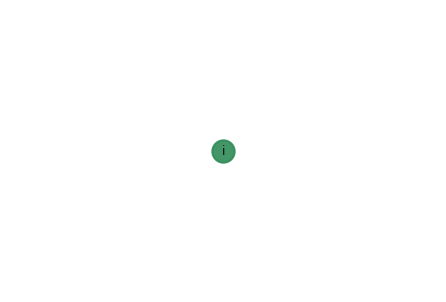

In [54]:
pos = nx.spring_layout(Graph_only_top_nodes)
plt.figure()
nx.draw(Graph_only_top_nodes, pos, edge_color='black', width=200, linewidths=2,node_size=500, node_color='seagreen', alpha=0.9,labels={node: node for node in Graph_only_top_nodes.nodes()})
plt.axis('off')
plt.show()

# Acknowledgements
For : https://dev.to/b_dmarius/python-keywords-extraction-machine-learning-project-series-part-2-2bii

**IDENTIFY TOKENS AND MAKE-UP DICTIONARY**

In [ ]:
# remove words that appear only once
from collections import defaultdict
frequency = defaultdict(int)
for text in Tokens_in_Corpus:
    for token in text:
        frequency[token] += 1

Frequent_Tokens_in_Corpus= [[token for token in text if frequency[token] > 1] for text in Tokens_in_Corpus]

from pprint import pprint  # pretty-printer
pprint(Frequent_Tokens_in_Corpus[4:5]) #these slices of lists go up to before the higher number. 

In [ ]:
#create dictionary, then map from ids to dictionary
dictionary = corpora.Dictionary(Frequent_Tokens_in_Corpus)
print(dictionary,"\n\n")
print(dictionary.token2id)

**CREATE BAG OF WORDS MODEL**

In [ ]:
#ie. a list of a list. For each document, we have a list of word frequency for each dictionary item
BAG_OF_WORDS_MODEL = [dictionary.doc2bow(text) for text in Frequent_Tokens_in_Corpus]
for c in BAG_OF_WORDS_MODEL:
    print(c)

From Quick start tutorial. 
"Now that we have vectorized our corpus we can begin to transform it using models. We use model as an abstract term referring to a transformation from one document representation to another. In gensim documents are represented as vectors so a model can be thought of as a transformation between two vector spaces. The details of this transformation are learned from the training corpus."

**CREATE TF-IDF MODEL**
One simple example of a model is tf-idf. The tf-idf model transforms vectors from the bag-of-words representation to a vector space where the frequency counts are weighted according to the relative rarity of each word in the corpus.
Let's initialize the tf-idf model, training it on our corpus.

In [ ]:
# train the model
TFIDF_MODEL= models.TfidfModel(BAG_OF_WORDS_MODEL)

**CREATE TOPIC MODEL via LSI** via CBOW AND TFIDF

In [ ]:
# LSI APPLIED ON TOP ON TFIDF
#now applying an LSI to the first corpus, by working on top of its representation as a TFIDF
# here we have created a two dim LSI space, like Deerwesters 1990 example
#Presumably we could create one on top of just the CBOW too
lsi_from_TFIDF= models.LsiModel(TFIDF_APPLIED_TO_TRAINING_CORPUS, id2word=dictionary, num_topics=3) # initialize an LSI transformation

#It is correct how it has this odd double-barrelled structure: 
#model = LsiModel(common_corpus, id2word=common_dictionary)
# >>> vectorized_corpus = model[common_corpus]  # vectorize input copus in BoW format

In [ ]:
#inspect the topics
lsi_from_TFIDF.print_topics(num_topics=-1, num_words=20) #-1 means show all topics .In significance order. Remember also _ve Contribs

In [ ]:
#Get a single topic as a formatted string with print_topic(topicno, topn=10)

In [ ]:
#to get as array use lsi.get_topics()

In [ ]:
# can Update model with new corpus using add_documents(corpus, chunksize=None, decay=None)
#can also save the LSI model

**FINDING VECTOR REPRESENTATION OF A WHOLE OLD OR NEW CORPUS**
To prepare for similarity queries, we need to enter all documents which we want to compare against subsequent queries. In our case, they are the same documents used for training LSI, converted to 3-D LSA space. But that’s only incidental, we might also be indexing a different corpus altogether.

   **REPRESENTATION OF OLD CORPUS: TFIDF**

In [ ]:
#now moved onto Topic and Transformations tutorial
#apply tfidf to the trained corpus
TFIDF_APPLIED_TO_TRAINING_CORPUS = TFIDF_MODEL[BAG_OF_WORDS_MODEL]
for doc in TFIDF_APPLIED_TO_TRAINING_CORPUS:
    print(doc)

   **REPRESENTATION OF OLD CORPUS: LSI FROM TFIDF**

In [ ]:
# create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi
TOPIC_MODEL_LSI_from_TFIDF_APPLIED_TO_CORPUS = lsi_from_TFIDF[TFIDF_APPLIED_TO_TRAINING_CORPUS] 

#particular documents aligned to particular topics
for doc in TOPIC_MODEL_LSI_from_TFIDF_APPLIED_TO_CORPUS: # both bow->tfidf and tfidf->lsi transformations are actually executed here, on the fly
    print(doc)

In [ ]:
#OPTIONAL
#this model can now be applied to another corpus other than the training one, not just individaul documents
#i have not pulled in a second corpus but this is how you would do it. Note you pull in a corpus (processed as above), not just docs. 
#corpus2nd_tfidf = TFIDF_MODEL[corpus2nd]
# for doc in corpus2nd_tfidf:
#   print(doc)

**FINDING VECTOR REPRESENTATION OF A SINGLE NEW DOCUMENT**

In [ ]:
# Up above, we had a CBOW representation of each document
#We can convert documents to that vector space,once tokenized

# eg.This is the announcement of the Sellafield partner programme. https://www.gov.uk/government/news/sellafield-ltd-awards-20-year-project-partnership
#Which ONR document is most relevant to this contract ?

In [ ]:
page = requests.get("https://www.gov.uk/government/news/sellafield-ltd-awards-20-year-project-partnership")
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')
new_doc=strip_multiple_whitespaces(soup.get_text())
print(new_doc)

#page = requests.get("https://www.gov.uk/government/news/nda-sets-out-its-grand-challenges")
#page.content[1:300]
# need to find which tag works well with this approach. p does not work well with this NEC text 
#soup.find_all('p')[5].get_text()

In [ ]:
new_doc=new_doc[0:5487]
print(new_doc)

In addition, we will be considering cosine similarity to determine the similarity of two vectors. Cosine similarity is a standard measure in Vector Space Modeling, but wherever the vectors represent probability distributions, different similarity measures may be more appropriate.

   **REPRESENTATION OF NEW DOCUMENT: CBOW ONLY**

In [ ]:
#convert tokenized documents to vector
new_vec_CBOW = dictionary.doc2bow(new_doc.lower().split())

In [ ]:
print(new_vec_CBOW)  # only those words that match up are given a dimension

   **REPRESENTATION OF NEW DOCUMENT: TFIDF**

In [ ]:
#convert the query to LSI space (based on TFIDF) 
new_vec_TFIDF=TFIDF_MODEL[new_vec_CBOW]

   **REPRESENTATION OF NEW DOCUMENT: LSI via TFIDF**

In [ ]:
new_vec_lsi_fromTFIDF = lsi_from_TFIDF[new_vec_TFIDF]
print(new_vec_lsi_fromTFIDF)  

**COSINE SIMILARITY**

moved onto Similarity search tutorial.
Based on this new doc query,we would like to sort our corpus documents in decreasing order of relevance to this query. Unlike modern search engines, here we only concentrate on a single aspect of possible similarities—on apparent semantic relatedness of their texts (words). No hyperlinks, no random-walk static ranks, just a semantic extension overthe boolean keyword match:

   **LSI VIA TFIDF**

In [ ]:
# LSI APPLIED ON TOP ON TFIDF
index = similarities.MatrixSimilarity(lsi_from_TFIDF[TFIDF_APPLIED_TO_TRAINING_CORPUS]) # transform corpus to LSI space and index it

In [ ]:
sims = index[new_vec_lsi_fromTFIDF] # perform a similarity query against the corpus BASED ON LSI - TDFIDF
print(list(enumerate(sims))) # print (document_number, document_similarity) 2-tuples

Cosine measure returns similarities in the range <-1, 1> (the greater, the more similar), so that the first document has a score of 0.99809301 etc.

With some standard Python magic we sort these similarities into descending order, and obtain the final answer to the query for Sellafield PPP:

In [ ]:
sims = sorted(enumerate(sims), key=lambda item: -item[1])
print(sims) # print sorted (document number, similarity score) 2-tuples

In [ ]:
#Most like
print (Corpus_of_Summaries[15])

In [ ]:
print (Corpus_of_Summaries[12])

In [ ]:
print (Corpus_of_Summaries[9])

In [ ]:
#Least like
print (Corpus_of_Summaries[11])

In [ ]:
print (Corpus_of_Summaries[10])

   **TFIDF ONLY**

In [ ]:
#Now the same but with TFIDF model
index = similarities.MatrixSimilarity(TFIDF_APPLIED_TO_TRAINING_CORPUS)
new_vec_TFIDF = TFIDF_MODEL[new_vec_CBOW] # convert the query to LSI space (based on TFIDF)
print(new_vec_TFIDF)  

In [ ]:
sims = index[new_vec_TFIDF] 
print(list(enumerate(sims)))
sims = sorted(enumerate(sims), key=lambda item: -item[1])
print ("\n")
print (sims)


**Using keywords into Neo4j concurrence...**


# Acknowledgements

This project relies extensively on the Gensim library, and the [examples](https://radimrehurek.com/gensim/auto_examples/index.html) provided by its creator Radim Hurek. I have done nothing more than apply a little of this to Portfolio management. The examples cited above would be the best way to get a full introduction to the capabilities of Gensim


@inproceedings{rehurek_lrec,
      title = {{Software Framework for Topic Modelling with Large Corpora}},
      author = {Radim {\v R}eh{\r u}{\v r}ek and Petr Sojka},
      booktitle = {{Proceedings of the LREC 2010 Workshop on New
           Challenges for NLP Frameworks}},
      pages = {45--50},
      year = 2010,
      month = May,
      day = 22,
      publisher = {ELRA},
      address = {Valletta, Malta},
      note={\url{http://is.muni.cz/publication/884893/en}},
      language={English}
}